In [1]:
from ishockpy import *

In [2]:
from numpy import linspace, sqrt, array, cos, pi, arange, piecewise
c=2.99E10





TOTAL_ENERGY = 2*1.E51/(4* pi)



dT = .005
t0 = 0.
Rmin = 1.2E4
#iTime = linspace(T0+dT,0.,NUM_SHELLS)
tw=10.

NUM_SHELLS = int(tw/dT)

dE = float(TOTAL_ENERGY)/float(NUM_SHELLS)
def GammaDist2(t):
    
    if t<=0.4*tw:
        val = 250.-150.* cos(pi*t/(.4*tw))
    else:
        val =400.

    return val

def GammaDist(i):
    
    if i>=100:
        gamma = 400.

    else:
        gamma = 100.

    return gamma


iGamma=[]

for t in arange(t0,tw,dT):

    iGamma.append(GammaDist2(t))


def RadialDist(i):
    
    v=c*sqrt((iGamma[i]**2)-1.)/iGamma[i]
    
    return -iTime[i]*v


def RadialDist2(i):
    
    v=c*sqrt((iGamma[i]**2)-1.)/iGamma[i]
    
    return Rmin+arange(t0,tw,dT)[i]*v



    

iRad = []

for i in range(NUM_SHELLS-1,-1,-1):

   
    iRad.append(RadialDist2(i))



    
    
   
    

iGamma = array(iGamma)

iMass = dE/(iGamma*(c**2))



In [3]:
%matplotlib inline
%matplotlib notebook

import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


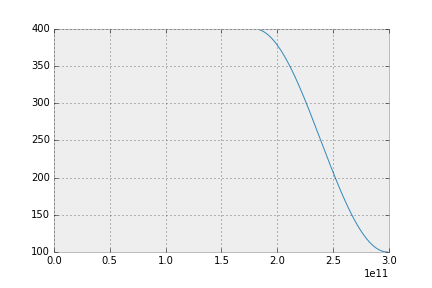

In [4]:
fig, ax = plt.subplots()

ax.plot(iRad,iGamma)

<IPython.core.display.Javascript object>


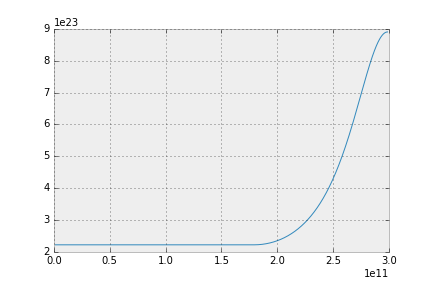

In [5]:
fig, ax = plt.subplots()

ax.plot(iRad,iMass)

In [6]:
jet = Jet(Rmin,dT,iMass,iGamma)

In [7]:
jet.start()

array([  4.29332755e+06,   2.85264764e+06,   8.35372880e+05,
         5.88445155e+05,   4.51298941e+05,   3.64053406e+05,
         3.03677492e+05,   2.59423372e+05,   2.25601015e+05,
         1.98916207e+05,   1.77329662e+05,   1.59511421e+05,
         1.44557113e+05,   1.31830327e+05,   1.20870219e+05,
         1.11334871e+05,   1.02965259e+05,   9.55615622e+04,
         8.89671683e+04,   8.30575904e+04,   7.77326338e+04,
         7.29107454e+04,   6.85248704e+04,   6.45193707e+04,
         6.08476914e+04,   5.74705819e+04,   5.43547166e+04,
         5.14716190e+04,   4.87968094e+04,   4.63091285e+04,
         4.39901929e+04,   4.18239538e+04,   3.97963394e+04,
         3.78949580e+04,   3.61088553e+04,   3.44283130e+04,
         3.28446773e+04,   3.13502185e+04,   2.99380113e+04,
         2.86018316e+04,   2.73360703e+04,   2.61356610e+04,
         2.49960131e+04,   2.39129600e+04,   2.28827093e+04,
         2.19018029e+04,   2.09670810e+04,   2.00756500e+04,
         1.92248556e+04,

In [8]:
jet._shells.time_to_collisions

[]

In [99]:
jet._shells.time_to_collisions

array([ 4322685.0964524 ,  2882005.1841916 ,   864730.42662634])

In [9]:
jet._shells.n_active_shells

1

In [98]:
jet._advance_time()
print jet.n_collisions

0


In [10]:
jet._shells.radii

array([], dtype=float64)

In [9]:
jet._collisions['radiated_energy']

0       1.071685e+18
1       3.230317e+18
2       6.414343e+18
3       1.079231e+19
4       1.599556e+19
5       2.271427e+19
6       2.978160e+19
7       3.902311e+19
8       4.773734e+19
9       5.974440e+19
10      6.982627e+19
11      8.490235e+19
12      9.601055e+19
13      1.145198e+20
14      1.262511e+20
15      1.486181e+20
16      1.605072e+20
17      1.872175e+20
18      1.987372e+20
19      2.303366e+20
20      2.408979e+20
21      2.779929e+20
22      2.869446e+20
23      3.302024e+20
24      3.368318e+20
25      3.869797e+20
26      3.905121e+20
27      4.483382e+20
28      4.479373e+20
29      5.142899e+20
            ...     
1969    2.182174e+22
1970    2.180524e+22
1971    2.178875e+22
1972    2.177229e+22
1973    2.175584e+22
1974    2.173941e+22
1975    2.172300e+22
1976    2.170661e+22
1977    2.169022e+22
1978    2.167386e+22
1979    2.165754e+22
1980    2.164122e+22
1981    2.162491e+22
1982    2.160862e+22
1983    2.159237e+22
1984    2.157613e+22
1985    2.155

<IPython.core.display.Javascript object>


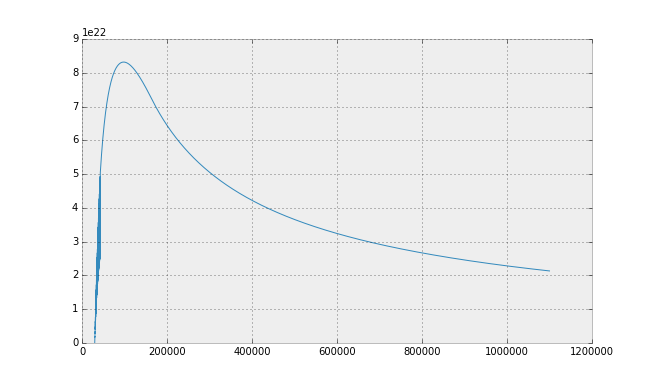

In [8]:
fig, ax = plt.subplots()


    
ax.plot(jet._collisions['time'],jet._collisions['radiated_energy'])
    



In [13]:
jet._shells.time_to_collisions.argmin()

127

In [16]:
jet._shells.velocity_ordered_shells[127]

radius: 877740755883580.250000
gamma: 118.271236
mass: 752607642597125580128256.000000

In [17]:
jet._shells.velocity_ordered_shells[128]

radius: 877740755883580.250000
gamma: 118.553998
mass: 750812604849439601852416.000000

In [9]:
jet._shells.velocity_ordered_shells

array([ radius: 298997049.626231
gamma: 100.000000
mass: 890118360487552482279424.000000,
       radius: 149504524.986032
gamma: 100.001157
mass: 890108065561937333714944.000000], dtype=object)

In [8]:
jet._shells.activate_shells(0.,0)

In [11]:
jet._shells.velocity_ordered_shells

array([], dtype=object)

In [12]:
import pandas as pd

In [17]:
df = pd.DataFrame(columns=['radius','time','gamma'])

In [18]:
df

,radius,time,gamma


In [21]:
df.loc[0]=[1,2,3]

In [22]:
df

,radius,time,gamma
0,1.0,2.0,3.0
